In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

In [5]:
def draw_landmarks_on_image(rgb_image, detection_results):
    pose_landmarks_list = detection_results.pose_landmarks
    annotated_image = np.copy(rgb_image)
    
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]
        post_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        post_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(
                x=landmark.x,
                y=landmark.y,
                z=landmark.z,
                visibility=landmark.visibility
            ) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
            annotated_image,
            post_landmarks_proto,
            solutions.pose.POSE_CONNECTIONS,
            solutions.drawing_styles.get_default_pose_landmarks_style()
        )
        
    return annotated_image

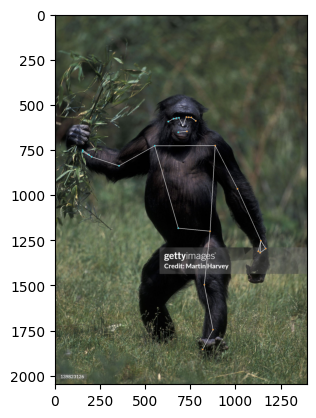

In [17]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# img = cv2.imread('monkey.jpg')
base_options = python.BaseOptions(model_asset_path='pose_landmarker_full.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True,
)
detector = vision.PoseLandmarker.create_from_options(options)

image = mp.Image.create_from_file('monkey2.jpg')
rgb_image = cv2.cvtColor(image.numpy_view(), cv2.COLOR_BGR2RGB)

detection_results = detector.detect(image)
annotated_image = draw_landmarks_on_image(rgb_image, detection_results)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))


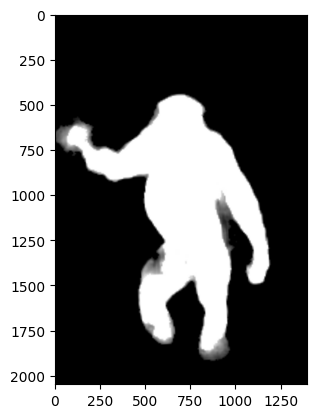

In [18]:
segmentation_mask = detection_results.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
plt.imshow(visualized_mask.astype(np.uint8))